## 1. Importing necessary libraries

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Prepare data

### 2.1. Load data

In [4]:
train_file = "/content/drive/MyDrive/sentiment-analysis-for-movie-reviews/DataPreprocessing/TrainingSet_orig_eda_embedding_wordnet.csv"
test_file = "/content/drive/MyDrive/sentiment-analysis-for-movie-reviews/DataPreprocessing/TestSet_orig_eda_embedding_wordnet.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)


### 2.2. TF-IDF Vectorizaton

In [5]:
X_train = df_train['sentence']
y_train = df_train['label']

X_test = df_test['sentence']
y_test = df_test['label']

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [6]:
y_train = df_train["label"]
y_test = df_test["label"]

## 3. Model training

### 3.1 Default parameter

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred_train = knn_model.predict(X_train_tfidf)
y_pred_test = knn_model.predict(X_test_tfidf)

In [15]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Test: {accuracy_train:.4f}")
print(f"Train: {accuracy_test: .4f}")

Test: 0.9269
Train:  0.6089


### 3.2 Hyperparameter tuning

After tuning the model using GridSearchCV, we found that K = 5 yields the best performance.

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)

y_pred_train = knn_model.predict(X_train_tfidf)
y_pred_test = knn_model.predict(X_test_tfidf)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training: {accuracy_train:.4f}")
print(f"Test: {accuracy_test:.4f}")

Training: 0.9142
Test: 0.6158


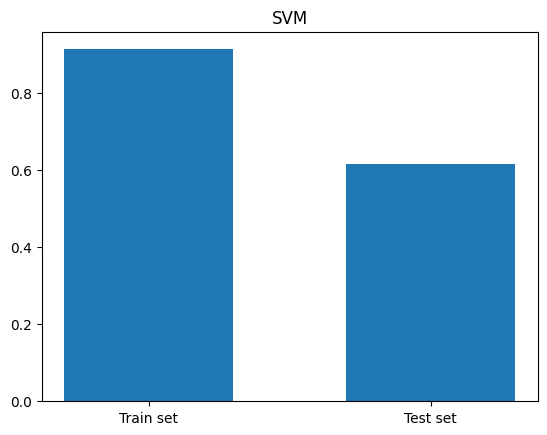

In [11]:
plt.bar(["Train set", "Test set"], [accuracy_train, accuracy_test ], width=.6)
plt.title("SVM")

plt.show()

## 3.3. Model evaluation

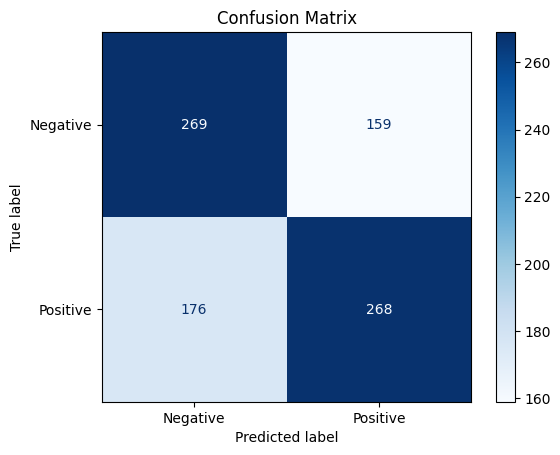

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_test,
    display_labels=["Negative", "Positive"],
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()

In [13]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6158
Precision: 0.6276
Recall: 0.6036
F1-score: 0.6154
